In [1]:
#!pip install wordcloud # to install wordcloud

In [2]:
import pandas as pd
import random

In [3]:
random.seed(123) # to allow evreyone using this code, to have the same results.

In [4]:
# Importing CSV dataset using pandas
df = pd.ExcelFile("C:\\Users\\Utilizador\\Desktop\\THESIS\\Webscrapping_DadosCSV_MaputoHotels_TripAdvisor\\ALL_DATA\\AllReviewsJustReviewsColumn.xlsx")
data=df.parse("AcaciaGuestHouse(En)Tripadvisor") # to read the specified excel sheet
print(data.head(10)) # to return the first 10 rows

                                         Review Text
,0  Good location & accommodation. Very nice and h...
,1  I made a booking through another site, but nee...
,2  The place looks nice, the rooms are comfortabl...
,3  Acacia Guest House is a basic, comfortable est...
,4  Great location, nice pool and outside area. Ol...
,5  People are really, nice.\nThe guesthouse is we...
,6  Rooms are a fair size with a work desk. Bathro...
,7  Pros: seems safe, good location, spacious room...
,8  Beautiful guesthouse/bed and breakfast in Mapu...
,9  Hands down one of the most comfortable beds I ...


In [5]:
from sklearn.model_selection import train_test_split

# Check the structure of the DataFrame
print("Columns in the DataFrame:")
print(data.columns)
print(data.head())

# Create some basic text features (word count and character count)
data['word_count'] = data['Review Text'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['Review Text'].apply(lambda x: len(str(x)))

# Separate features and target
X = data.drop(columns=["Review Text"])  # Features
y = data["Review Text"]  # Target variable

# Splitting the data into training and testing sets
test_size = 0.3  # 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Print the training and testing data to verify
print("Training features:")
print(X_train.head())
print("\nTraining target:")
print(y_train.head())

print("\nTesting features:")
print(X_test.head())
print("\nTesting target:")
print(y_test.head())

Columns in the DataFrame:
,Index(['Review Text'], dtype='object')
,                                         Review Text
,0  Good location & accommodation. Very nice and h...
,1  I made a booking through another site, but nee...
,2  The place looks nice, the rooms are comfortabl...
,3  Acacia Guest House is a basic, comfortable est...
,4  Great location, nice pool and outside area. Ol...
,Training features:
,      word_count  char_count
,5228          44         263
,3276          55         300
,490           53         263
,3945          87         504
,862           62         360
,
,Training target:
,5228    The staff were friendly. Rooms were perfect an...
,3276    had great stay at the hotel and after a long d...
,490     Their bus service is just a regular chapa whic...
,3945    I had a splendid time at your hotel. Starting ...
,862     Spend there 3 days. Well organized (pick-up, c...
,Name: Review Text, dtype: object
,
,Testing features:
,      word_count  char_count
,5010     

In [6]:
#NOW THAT THE TRAINING AND TEST DATA SETS ARE DIVIDED, LETS SAVE THEM IN 2 SEPERATE DATA SETS:

# Combine training features and target into a single DataFrame
train_data = X_train.copy()
train_data['Review Text'] = y_train

# Combine testing features and target into a single DataFrame
test_data = X_test.copy()
test_data['Review Text'] = y_test

# Save the training data to a CSV file
train_data.to_csv("C://Users//Utilizador//Desktop//THESIS//Webscrapping_DadosCSV_MaputoHotels_TripAdvisor//ALL_DATA//train_data.csv", index=False)

# Save the testing data to a CSV file
test_data.to_csv("C://Users//Utilizador//Desktop//THESIS//Webscrapping_DadosCSV_MaputoHotels_TripAdvisor//ALL_DATA//test_data.csv", index=False)

print("Training and testing data have been saved to CSV files.")

Training and testing data have been saved to CSV files.


In [7]:
#Now that the train and test data are saved into two different CSVs, now we read each file
import pandas as pd

# Define the file paths
train_file_path = "C://Users//Utilizador//Desktop//THESIS//Webscrapping_DadosCSV_MaputoHotels_TripAdvisor//ALL_DATA//train_data.csv"
test_file_path = "C://Users//Utilizador//Desktop//THESIS//Webscrapping_DadosCSV_MaputoHotels_TripAdvisor//ALL_DATA//test_data.csv"

# Read the training data from the CSV file
train_data = pd.read_csv(train_file_path)

# Read the testing data from the CSV file
test_data = pd.read_csv(test_file_path)

# Display the first few rows of the training data
print("Training Data:")
print(train_data.head())

# Display the first few rows of the testing data
print("Testing Data:")
print(test_data.head())

Training Data:
,   word_count  char_count                                        Review Text
,0          44         263  The staff were friendly. Rooms were perfect an...
,1          55         300  had great stay at the hotel and after a long d...
,2          53         263  Their bus service is just a regular chapa whic...
,3          87         504  I had a splendid time at your hotel. Starting ...
,4          62         360  Spend there 3 days. Well organized (pick-up, c...
,Testing Data:
,   word_count  char_count                                        Review Text
,0         234        1338  I am a frequent traveler. My concern has alway...
,1          58         327  The rooms are very well furnished and upmarket...
,2          87         502  A pity because the location is great - it's re...
,3          77         420  After 26 days on the road, southern sun maputo...
,4         342        1864  Unfortunately we caught heavy traffic on a Fri...


In [8]:
#!pip install --upgrade pillow # Isto foi para resolver ERRO DE WORLDCLOUD (depois de instalar tive de fazer restart do kernel)

In [9]:
#!pip install --upgrade pip #Isto foi para resolver ERRO DE WORLDCLOUD (depois de instalar tive de fazer restart do kernel)

In [10]:
#!pip install numpy # Isto foi para resolver ERRO DE WORLDCLOUD (depois de instalar tive de fazer restart do kernel)

In [11]:
#!pip install wordcloud

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

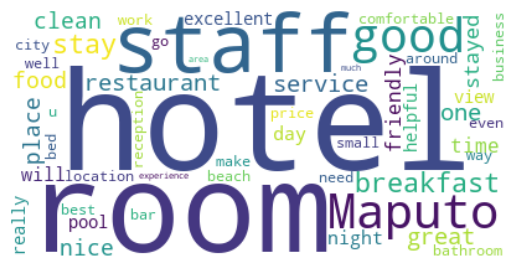

In [13]:
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue', width=400, height=200)
wordcloud.generate(" ".join(text for text in train_data['Review Text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
# Only recognizable words appearing, no cleaning to do
# Bigger words are: "Hotel", "Room", "Staff", "Good", "Maputo", "Service".

In [15]:
# Check variables's types:
print(train_data.dtypes)
print(test_data.dtypes)

# variables are objects and int

word_count      int64
,char_count      int64
,Review Text    object
,dtype: object
,word_count      int64
,char_count      int64
,Review Text    object
,dtype: object


In [2]:
#!pip install nltk
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

In [ ]:
import nltk

In [18]:
# ## 3.2. TOKENIZATION
# Defining my tokenize_text function:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [19]:
# Defining variables:
train_data_tokenized = train_data.copy()
test_data_tokenized = test_data.copy()

In [3]:
#Applying the function to the "Review Text" column: The apply method in pandas is used to apply tokenize_text to each element in the "Review Text" column.
##train_data_tokenized['Review Text'] = train_data_tokenized['Review Text'].apply(tokenize_text)
##test_data_tokenized['Review Text'] = test_data_tokenized['Review Text'].apply(tokenize_text)

In [21]:
import string

## REMOVING PUNTUATION
punctset = set(string.punctuation) # punctuation set
print(punctset)

{':', ';', ']', ')', '\\', '+', '#', '_', '$', '%', '(', '.', '[', '>', '~', '&', '"', '*', '=', '?', "'", '^', '{', '@', '!', '-', '`', '/', ',', '<', '}', '|'}


In [22]:
## The lambda function is used to filter out punctuation tokens from the tokenized text
train_data_tokenized['Review Text'] = train_data_tokenized['Review Text'].apply(lambda x: [token for token in x if token not in punctset])
test_data_tokenized['Review Text'] = test_data_tokenized['Review Text'].apply(lambda x: [token for token in x if token not in punctset])

In [23]:
train_data_tokenized.head(10)

,word_count,char_count,Review Text
0,44,263,"[T, h, e, , s, t, a, f, f, , w, e, r, e, , ..."
1,55,300,"[h, a, d, , g, r, e, a, t, , s, t, a, y, , ..."
2,53,263,"[T, h, e, i, r, , b, u, s, , s, e, r, v, i, ..."
3,87,504,"[I, , h, a, d, , a, , s, p, l, e, n, d, i, ..."
4,62,360,"[S, p, e, n, d, , t, h, e, r, e, , 3, , d, ..."
5,53,306,"[P, i, r, i, c, e, s, , h, a, v, e, , g, o, ..."
6,138,800,"[I, , s, t, a, y, e, d, , h, e, r, e, , a, ..."
7,117,671,"[0, , s, t, a, r, s, , f, o, r, , t, h, e, ..."
8,61,324,"[G, o, o, d, , s, u, r, p, r, i, s, e, , i, ..."
9,62,308,"[T, h, i, s, , i, s, , t, h, e, , o, n, l, ..."


In [24]:
## TOKENS WITH LOWERCASING / TRANSFORMING EVERY WORD TO LOWER CASE (variable = Tokenized Lower Case):
train_data_tokenizedlc = train_data_tokenized.copy()
test_data_tokenizedlc = train_data_tokenized.copy()

In [25]:
train_data_tokenizedlc['Review Text'] = train_data_tokenizedlc['Review Text'].apply(lambda x: [word.lower() for word in x])
test_data_tokenizedlc['Review Text'] = test_data_tokenizedlc['Review Text'].apply(lambda x: [word.lower() for word in x])

In [26]:
train_data_tokenizedlc.head()

,word_count,char_count,Review Text
0,44,263,"[t, h, e, , s, t, a, f, f, , w, e, r, e, , ..."
1,55,300,"[h, a, d, , g, r, e, a, t, , s, t, a, y, , ..."
2,53,263,"[t, h, e, i, r, , b, u, s, , s, e, r, v, i, ..."
3,87,504,"[i, , h, a, d, , a, , s, p, l, e, n, d, i, ..."
4,62,360,"[s, p, e, n, d, , t, h, e, r, e, , 3, , d, ..."


In [27]:
# REMOVING STOP WORDS (variable = Tokenized Lower Case No Stop):
train_data_tokenizedlcnostop = train_data_tokenizedlc.copy()
test_data_tokenizedlcnostop =  test_data_tokenizedlc.copy()

In [28]:
from nltk.corpus import stopwords
stopwordsset = set(stopwords.words('english'))
print(stopwordsset)

{'hers', 'am', 'who', 'they', 'the', 'wouldn', 'so', 'for', 'shan', "shouldn't", 'did', 'own', 'll', 'were', 'you', 'his', 'it', 'while', 'yours', 'this', 'doesn', 'can', 'have', 'too', 'do', 'most', 've', 'which', 'has', 'haven', 'yourselves', "wouldn't", 'of', "you'll", 'such', 'been', 'that', 'than', 'my', 'both', 'isn', 'be', 'hasn', 'below', 'he', "haven't", 'she', 'hadn', 'but', 'its', 'through', 'y', 'nor', 'didn', 'any', 'a', 'in', 'me', 'on', 'needn', 'ours', 'theirs', 'more', 'i', 'out', 'does', 'm', 'ourselves', "couldn't", 'not', 'those', 'had', 'won', 'where', 'few', "you've", 'is', 'each', 'her', 'ain', 'yourself', 'doing', 'what', "hadn't", "should've", 'himself', 'myself', 'are', 't', 'these', 'or', "mightn't", 'against', "it's", 'again', 'other', 'until', 'having', 'and', "she's", 'at', 'same', 'him', 'after', 'itself', 'will', 'into', 'up', 'under', 'as', 'don', 'aren', 'wasn', 'only', "mustn't", "wasn't", 's', 'themselves', 'no', 'once', 'from', "doesn't", "don't", '

In [29]:
stopwordsset.update(["'s", "``", "''", "n't"])
# joining useless expressions to the set as well that were visible in the data

In [30]:
train_data_tokenizedlcnostop['Review Text'] = train_data_tokenizedlcnostop['Review Text'].apply(lambda x: [token for token in x if token not in stopwordsset])
test_data_tokenizedlcnostop['Review Text'] = test_data_tokenizedlcnostop['Review Text'].apply(lambda x: [token for token in x if token not in stopwordsset])

In [31]:
train_data_tokenizedlcnostop.head()

,word_count,char_count,Review Text
0,44,263,"[h, e, , f, f, , w, e, r, e, , f, r, e, n, ..."
1,55,300,"[h, , g, r, e, , , , h, e, , h, e, l, , ..."
2,53,263,"[h, e, r, , b, u, , e, r, v, c, e, , , j, ..."
3,87,504,"[ , h, , , p, l, e, n, , e, , , u, r, , ..."
4,62,360,"[p, e, n, , h, e, r, e, , 3, , , w, e, l, ..."


In [32]:
# STEMMING:
# Cuts words to basic form w/o considering if a word exists morphologically , for example, it can cut bus to bu.
from nltk.stem import PorterStemmer # using NLTK
train_data_stemming = train_data_tokenizedlcnostop.copy()
test_data_stemming = test_data_tokenizedlcnostop.copy()

In [33]:
stemmer = PorterStemmer() # Porter Stemmer is an algorithm used to stem words

In [34]:
train_data_stemming['Review Text'] = train_data_stemming['Review Text'].apply(lambda x: [stemmer.stem(token) for token in x])
test_data_stemming['Review Text'] = test_data_stemming['Review Text'].apply(lambda x: [stemmer.stem(token) for token in x])

In [35]:
train_data_stemming.head()

,word_count,char_count,Review Text
0,44,263,"[h, e, , f, f, , w, e, r, e, , f, r, e, n, ..."
1,55,300,"[h, , g, r, e, , , , h, e, , h, e, l, , ..."
2,53,263,"[h, e, r, , b, u, , e, r, v, c, e, , , j, ..."
3,87,504,"[ , h, , , p, l, e, n, , e, , , u, r, , ..."
4,62,360,"[p, e, n, , h, e, r, e, , 3, , , w, e, l, ..."


In [36]:
# LEMMATIZATION
# Cuts words to basic form but it does consider if a word exists morphologically like it can cut running and ran and run to run.
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet') # Já tem lá em cima
train_data_lemma = train_data_tokenizedlcnostop.copy()
test_data_lemma = test_data_tokenizedlcnostop.copy()

In [37]:
lemmatizer = WordNetLemmatizer() #  Algorithm used to lemmatize words

In [38]:
train_data_lemma['Review Text'] = train_data_lemma['Review Text'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
test_data_lemma['Review Text'] = test_data_lemma['Review Text'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [39]:
train_data_lemma.head()

,word_count,char_count,Review Text
0,44,263,"[h, e, , f, f, , w, e, r, e, , f, r, e, n, ..."
1,55,300,"[h, , g, r, e, , , , h, e, , h, e, l, , ..."
2,53,263,"[h, e, r, , b, u, , e, r, v, c, e, , , j, ..."
3,87,504,"[ , h, , , p, l, e, n, , e, , , u, r, , ..."
4,62,360,"[p, e, n, , h, e, r, e, , 3, , , w, e, l, ..."


In [41]:
# PART OF SPEECH TAGGING (assigning words to their part of speech like: word, verb, noun, pronoun etc...):
train_data_pos = train_data_tokenizedlcnostop.copy()
test_data_pos = test_data_tokenizedlcnostop.copy()

In [4]:
#nltk.download('averaged_perceptron_tagger')

In [43]:
# tag the tokens using NLTK POS tagger
def pos_tag(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return ' '.join([tag[1] for tag in tagged_tokens])

In [5]:
#train_data_pos['tagged_text'] = train_data_pos['Review Text'].apply(pos_tag)

In [45]:
train_data_pos.head()

,word_count,char_count,Review Text
0,44,263,"[h, e, , f, f, , w, e, r, e, , f, r, e, n, ..."
1,55,300,"[h, , g, r, e, , , , h, e, , h, e, l, , ..."
2,53,263,"[h, e, r, , b, u, , e, r, v, c, e, , , j, ..."
3,87,504,"[ , h, , , p, l, e, n, , e, , , u, r, , ..."
4,62,360,"[p, e, n, , h, e, r, e, , 3, , , w, e, l, ..."


In [47]:
## Pre-processing finished, now results and discussion questions and experiments (models etc)
## To answer the questions: 
#  Discover the key hotel attributes/amenities most valued by customers.
# Perform an analysis of the reviews over time to discover trends.
# perform an analysis of the reviews, comparing summer and winter.
# Conduct an analysis of the reviews based on the region of the hotel.
# Assess the overall satisfaction trend over time.

In [59]:
#  Discover the key hotel attributes/amenities most valued by customers.
# 1st. - Loading both datasets:
import pandas as pd

# Load the train and test datasets

train_data_textBlob = train_data.copy() ## trabalho de text minig fizemos com este dataset
test_data_textBlob = test_data.copy() ## trabalho de text minig fizemos com este dataset

In [53]:
## Defining a function to extract mentions of amenities and their sentiment scores from the reviews.
## Also function that is case-insensitive to allow that the list of ammenities reads all

#!pip install TextBlob

from textblob import TextBlob

# Sample list of amenities
amenities = ['service','room','staff','stay','clean','price','food','bed','restaurant','bathroom','breakfast','wifi', 'pool', 'parking', 'internet', 'wi-fi']

def extract_mentions_and_sentiment(reviews, amenities):
    mentions = {amenity: [] for amenity in amenities}
    for review in reviews:
        sentiment = TextBlob(review).sentiment.polarity
        review_lower = review.lower()
        for amenity in amenities:
            if amenity in review_lower:
                mentions[amenity].append(sentiment)
    return mentions

# Apply the function to the reviews in the train dataset
train_mentions_sentiments = extract_mentions_and_sentiment(train_data_textBlob['Review Text'], [amenity.lower() for amenity in amenities])
#print(train_mentions_sentiments) ## Prints everything

# Print sample output
for amenity, sentiments in train_mentions_sentiments.items():
    print(f"{amenity}: {sentiments[:5]}... (total: {len(sentiments)})")

service: [0.48986772486772484, 0.24444444444444446, 0.28611111111111115, 0.36853174603174604, 0.5887878787878787]... (total: 1213)
,room: [0.48986772486772484, 0.4711111111111111, 0.6035714285714285, 0.28611111111111115, 0.17562499999999998]... (total: 2530)
,staff: [0.48986772486772484, 0.17562499999999998, 0.5887878787878787, 0.2985610766045549, -0.020531400966183593]... (total: 1842)
,stay: [0.4711111111111111, 0.6035714285714285, 0.28611111111111115, 0.36853174603174604, -0.17430555555555557]... (total: 1920)
,clean: [0.48986772486772484, 0.4711111111111111, 0.6035714285714285, 0.28611111111111115, -0.17430555555555557]... (total: 1205)
,price: [-0.17430555555555557, -0.020531400966183593, 0.09065170940170938, 0.32690848214285717, 0.1582857142857143]... (total: 587)
,food: [0.48986772486772484, 0.6035714285714285, 0.28611111111111115, 0.26710204081632655, 0.5887878787878787]... (total: 1042)
,bed: [0.2985610766045549, 0.3015151515151515, 0.308974358974359, 0.05512820512820511, 0.37

In [54]:
# 2nd. - Calculate average sentiment scores for each ammenity
avg_sentiment_scores = {amenity: sum(scores) / len(scores) if scores else 0 for amenity, scores in train_mentions_sentiments.items()}
print(avg_sentiment_scores)

{'service': 0.28652858853938934, 'room': 0.26162194685870843, 'staff': 0.29026531462093735, 'stay': 0.2767886875949533, 'clean': 0.2823469990004675, 'price': 0.2046686030988327, 'food': 0.3082825949028838, 'bed': 0.21699292392308017, 'restaurant': 0.27892231151120994, 'bathroom': 0.20470442771172934, 'breakfast': 0.28219146848358845, 'wifi': 0.2553122659286757, 'pool': 0.307247731589487, 'parking': 0.275738147673855, 'internet': 0.21676027223716193, 'wi-fi': 0.22927926150416797}


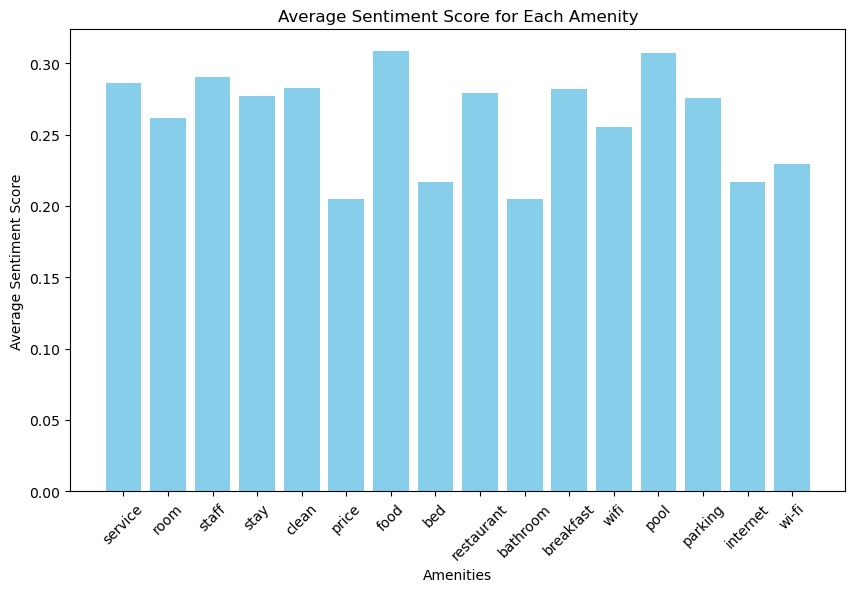

In [63]:
#Creating bar charts to display average sentiment scores
import matplotlib.pyplot as plt

# Data for visualization
amenities = list(avg_sentiment_scores.keys())
avg_scores = list(avg_sentiment_scores.values())

# Creating bar chart
plt.figure(figsize=(10, 6))
plt.bar(amenities, avg_scores, color='skyblue')
plt.xlabel('Amenities')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score for Each Amenity')
plt.xticks(rotation=45)
plt.show()

In [57]:
## Now performing sentiment analysis with VADER (because it is specially made for social media texts and small reviews like the current ones)
!pip install vaderSentiment

,  Downloading vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
,Requirement already satisfied: requests in c:\users\utilizador\anaconda3\lib\site-packages (from vaderSentiment) (2.31.0)
,Requirement already satisfied: charset-normalizer<4,>=2 in c:\users\utilizador\anaconda3\lib\site-packages (from requests->vaderSentiment) (2.0.4)
,Requirement already satisfied: idna<4,>=2.5 in c:\users\utilizador\anaconda3\lib\site-packages (from requests->vaderSentiment) (3.4)
,Requirement already satisfied: urllib3<3,>=1.21.1 in c:\users\utilizador\anaconda3\lib\site-packages (from requests->vaderSentiment) (2.0.7)
,Requirement already satisfied: certifi>=2017.4.17 in c:\users\utilizador\anaconda3\lib\site-packages (from requests->vaderSentiment) (2024.2.2)
,Downloading vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
,   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
,   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
,   --- --------------

In [58]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [60]:
## 2nd. - Extracting Mentions of Amenities and Calculating Sentiment with VADER

# Sample list of amenities
amenities = ['service','room','staff','stay','clean','price','food','bed','restaurant','bathroom','breakfast','wifi', 'pool', 'parking', 'internet', 'wi-fi']

def extract_mentions_and_sentiment_vader(reviews, amenities):
    analyzer = SentimentIntensityAnalyzer()
    mentions = {amenity: [] for amenity in amenities}
    for review in reviews:
        review_lower = review.lower()
        for amenity in amenities:
            if amenity in review_lower:
                sentiment = analyzer.polarity_scores(review)
                mentions[amenity].append(sentiment['compound'])
    return mentions

# Apply the function to the reviews in the train dataset
train_mentions_sentiments_vader = extract_mentions_and_sentiment_vader(train_data_textBlob['Review Text'], [amenity.lower() for amenity in amenities])

# Print sample output
for amenity, sentiments in train_mentions_sentiments_vader.items():
    print(f"{amenity}: {sentiments[:5]}... (total: {len(sentiments)})")

service: [0.9789, 0.2558, 0.9763, 0.9943, 0.9878]... (total: 1213)
,room: [0.9789, 0.9061, 0.9915, 0.9763, 0.9345]... (total: 2530)
,staff: [0.9789, 0.9345, 0.9878, 0.9942, 0.8711]... (total: 1842)
,stay: [0.9061, 0.9915, 0.9763, 0.9943, -0.8765]... (total: 1920)
,clean: [0.9789, 0.9061, 0.9915, 0.9763, -0.8765]... (total: 1205)
,price: [-0.8765, 0.8711, 0.9588, 0.9704, 0.5106]... (total: 587)
,food: [0.9789, 0.9915, 0.9763, 0.7351, 0.9878]... (total: 1042)
,bed: [0.9942, 0.9661, 0.9606, -0.1226, 0.9798]... (total: 567)
,restaurant: [0.2323, 0.9864, 0.6894, 0.9796, 0.9588]... (total: 1049)
,bathroom: [-0.8765, 0.9942, 0.984, 0.9844, 0.9609]... (total: 420)
,breakfast: [0.9061, 0.9915, 0.9345, 0.9943, 0.9907]... (total: 1526)
,wifi: [0.9942, 0.743, 0.9274, 0.7669, 0.8874]... (total: 374)
,pool: [0.9789, 0.9878, 0.9802, 0.9924, 0.9864]... (total: 846)
,parking: [0.9763, 0.9922, 0.9848, 0.9457, 0.9485]... (total: 111)
,internet: [0.9942, 0.743, 0.9588, 0.5106, -0.1226]... (total: 346)
,wi

In [61]:
# 3rd. - Calculate average sentiment scores of each ammenity
avg_sentiment_scores_vader = {amenity: sum(scores) / len(scores) if scores else 0 for amenity, scores in train_mentions_sentiments_vader.items()}

# Print the average sentiment scores
print("Average Sentiment Scores (VADER):")
for amenity, score in avg_sentiment_scores_vader.items():
    print(f"{amenity}: {score:.3f}")

Average Sentiment Scores (VADER):
,service: 0.731
,room: 0.695
,staff: 0.768
,stay: 0.743
,clean: 0.777
,price: 0.619
,food: 0.791
,bed: 0.636
,restaurant: 0.775
,bathroom: 0.610
,breakfast: 0.756
,wifi: 0.733
,pool: 0.827
,parking: 0.729
,internet: 0.610
,wi-fi: 0.719


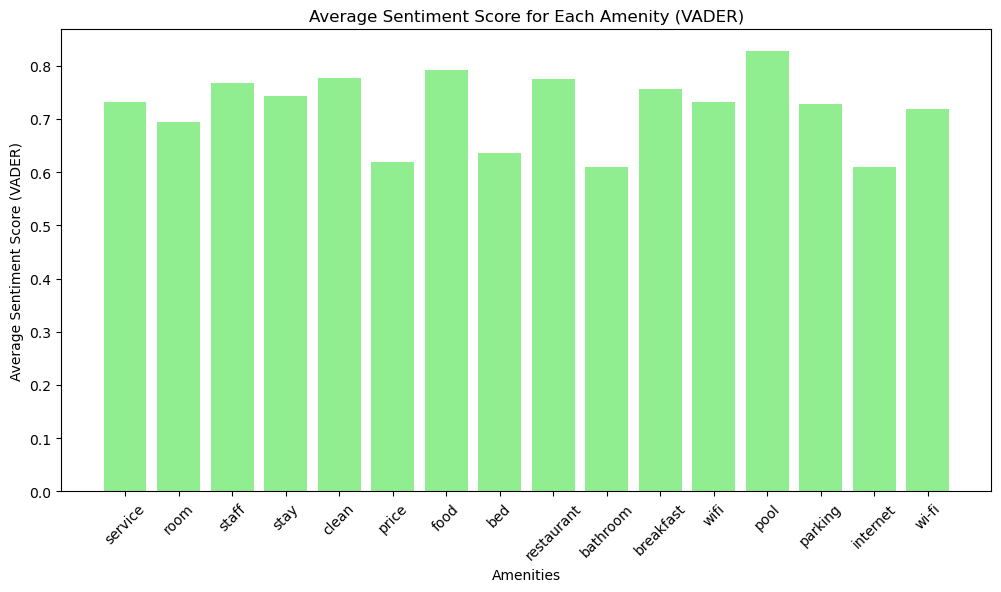

In [62]:
#Visualizing the results
import matplotlib.pyplot as plt

# Data for visualization
amenities = list(avg_sentiment_scores_vader.keys())
avg_scores = list(avg_sentiment_scores_vader.values())

# Creating bar chart
plt.figure(figsize=(12, 6))
plt.bar(amenities, avg_scores, color='lightgreen')
plt.xlabel('Amenities')
plt.ylabel('Average Sentiment Score (VADER)')
plt.title('Average Sentiment Score for Each Amenity (VADER)')
plt.xticks(rotation=45)
plt.show()

In [ ]:

#Summary of Outputs
#Mentions and Sentiment Scores (VADER): A dictionary with each amenity and a list of VADER compound sentiment scores for reviews mentioning that amenity.
#Average Sentiment Scores (VADER): A dictionary with each amenity and its average VADER sentiment score.
#Visualization: A bar chart displaying the average VADER sentiment scores for each amenity.
#Interpretation and Comparison

#TextBlob:

#Provides a general sentiment polarity score.
#Suitable for various types of texts.

#VADER:

#Provides compound scores along with positive, negative, and neutral scores.
#Optimized for social media and informal text.
#May offer more nuanced sentiment detection in reviews with slang, emoticons, and informal language.
#By comparing the results from TextBlob and VADER, you can gain deeper insights into customer sentiments and verify the consistency of your sentiment analysis across different tools.

In [3]:
## STEP 3 - GOAL 3

#Perform an Analysis of the Reviews Over Time to Discover Trends
#•	Time-Series Analysis: Aggregate reviews by time periods (e.g., month, quarter, year) and analyze the sentiment scores over these periods.
#•	Visualize: Create line graphs or other time-series visualizations to show trends in sentiment scores over time.

import pandas as pd
import random

## Read the data:
# Importing CSV dataset using pandas
df = pd.ExcelFile("C:\\Users\\Utilizador\\Desktop\\THESIS\\Webscrapping_DadosCSV_MaputoHotels_TripAdvisor\\ALL_DATA\\AllReviewsFromAllHotels.xlsx")
data=df.parse("AcaciaGuestHouse(En)Tripadvisor") # to read the specified excel sheet
print(data.head(10)) # to return the first 10 rows


  User Location  Rating                                        Review Text  \
,0       Dunedin       5  Good location & accommodation. Very nice and h...   
,1           NaN       1  I made a booking through another site, but nee...   
,2           NaN       1  The place looks nice, the rooms are comfortabl...   
,3  Johannesburg       3  Acacia Guest House is a basic, comfortable est...   
,4           NaN       4  Great location, nice pool and outside area. Ol...   
,5         Porto       4  People are really, nice.\nThe guesthouse is we...   
,6      Hermanus       4  Rooms are a fair size with a work desk. Bathro...   
,7        Moscow       2  Pros: seems safe, good location, spacious room...   
,8    Mozambique       4  Beautiful guesthouse/bed and breakfast in Mapu...   
,9       Belfast       5  Hands down one of the most comfortable beds I ...   
,
,   Stay Date            Location  
,0 2019-10-31  Acacia Guest House  
,1 2019-07-31  Acacia Guest House  
,2 2019-03-31  Acacia 

In [4]:
# 2ND: SPLIT INTO TRAIN AND TEST DATA and use the train data to be consistent
from sklearn.model_selection import train_test_split

# Check the structure of the DataFrame
print("Columns in the DataFrame:")
print(data.columns)
print(data.head())

# Create some basic text features (word count and character count)
#data['word_count'] = data['Review Text'].apply(lambda x: len(str(x).split()))
#data['char_count'] = data['Review Text'].apply(lambda x: len(str(x)))

# Separate features and target
X = data.drop(columns=["Review Text"])  # Features
y = data["Review Text"]  # Target variable

# Splitting the data into training and testing sets
test_size = 0.3  # 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Print the training and testing data to verify
print("Training features:")
print(X_train.head())
print("\nTraining target:")
print(y_train.head())

print("\nTesting features:")
print(X_test.head())
print("\nTesting target:")
print(y_test.head())

Columns in the DataFrame:
,Index(['User Location', 'Rating', 'Review Text', 'Stay Date', 'Location'], dtype='object')
,  User Location  Rating                                        Review Text  \
,0       Dunedin       5  Good location & accommodation. Very nice and h...   
,1           NaN       1  I made a booking through another site, but nee...   
,2           NaN       1  The place looks nice, the rooms are comfortabl...   
,3  Johannesburg       3  Acacia Guest House is a basic, comfortable est...   
,4           NaN       4  Great location, nice pool and outside area. Ol...   
,
,   Stay Date            Location  
,0 2019-10-31  Acacia Guest House  
,1 2019-07-31  Acacia Guest House  
,2 2019-03-31  Acacia Guest House  
,3 2018-09-30  Acacia Guest House  
,4 2018-07-31  Acacia Guest House  
,Training features:
,          User Location  Rating  Stay Date  \
,5228  Cape Town Central       4 2016-02-29   
,3276       Johannesburg       4 2017-11-30   
,490           Nuremberg     

In [5]:
#NOW THAT THE TRAINING AND TEST DATA SETS ARE DIVIDED, LETS SAVE THEM IN 2 SEPERATE DATA SETS:

# Combine training features and target into a single DataFrame
train_dataMonthYear = X_train.copy()
train_dataMonthYear['Review Text'] = y_train

# Combine testing features and target into a single DataFrame
test_dataMonthYear = X_test.copy()
test_dataMonthYear['Review Text'] = y_test

# Save the training data to a CSV file
train_dataMonthYear.to_csv("C://Users//Utilizador//Desktop//THESIS//Webscrapping_DadosCSV_MaputoHotels_TripAdvisor//ALL_DATA//train_dataMonthYear.csv", index=False)

# Save the testing data to a CSV file
test_dataMonthYear.to_csv("C://Users//Utilizador//Desktop//THESIS//Webscrapping_DadosCSV_MaputoHotels_TripAdvisor//ALL_DATA//test_dataMonthYear.csv", index=False)

print("Training and testing data have been saved to CSV files.")

Training and testing data have been saved to CSV files.


In [6]:
#Now that we've saved the train and test data into two different CSVs, it's time to read each file
import pandas as pd

# Define the file paths
train_file_path = "C://Users//Utilizador//Desktop//THESIS//Webscrapping_DadosCSV_MaputoHotels_TripAdvisor//ALL_DATA//train_dataMonthYear.csv"
test_file_path = "C://Users//Utilizador//Desktop//THESIS//Webscrapping_DadosCSV_MaputoHotels_TripAdvisor//ALL_DATA//test_dataMonthYear.csv"

# Read the training data from the CSV file
train_dataMonthYear = pd.read_csv(train_file_path)

# Read the testing data from the CSV file
test_dataMonthYear = pd.read_csv(test_file_path)

# Display the first few rows of the training data
print("Training Data:")
print(train_dataMonthYear.head())

# Display the first few rows of the testing data
print("Testing Data:")
print(test_dataMonthYear.head())

Training Data:
,       User Location  Rating   Stay Date  \
,0  Cape Town Central       4  2016-02-29   
,1       Johannesburg       4  2017-11-30   
,2          Nuremberg       1  2018-08-31   
,3                NaN       4  2019-09-30   
,4             Poznan       4  2015-08-31   
,
,                                 Location  \
,0                  VIP Grand Maputo Hotel   
,1  Radisson Blu Hotel & Residence, Maputo   
,2                   Fatima's Place Maputo   
,3                     Southern Sun Maputo   
,4                           Hotel Avenida   
,
,                                         Review Text  
,0  The staff were friendly. Rooms were perfect an...  
,1  had great stay at the hotel and after a long d...  
,2  Their bus service is just a regular chapa whic...  
,3  I had a splendid time at your hotel. Starting ...  
,4  Spend there 3 days. Well organized (pick-up, c...  
,Testing Data:
,    User Location  Rating   Stay Date                      Location  \
,0          

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load your data from a CSV file
train_dataMonthYear_df = pd.read_csv('C://Users//Utilizador//Desktop//THESIS//Webscrapping_DadosCSV_MaputoHotels_TripAdvisor//ALL_DATA//train_dataMonthYear.csv')

# Check the first few rows of the DataFrame to ensure it loaded correctly
print(train_dataMonthYear_df.head())

# Check column names to ensure 'Stay Date' is present
print("Columns in the dataset:", train_dataMonthYear_df.columns)

       User Location  Rating   Stay Date  \
,0  Cape Town Central       4  2016-02-29   
,1       Johannesburg       4  2017-11-30   
,2          Nuremberg       1  2018-08-31   
,3                NaN       4  2019-09-30   
,4             Poznan       4  2015-08-31   
,
,                                 Location  \
,0                  VIP Grand Maputo Hotel   
,1  Radisson Blu Hotel & Residence, Maputo   
,2                   Fatima's Place Maputo   
,3                     Southern Sun Maputo   
,4                           Hotel Avenida   
,
,                                         Review Text  
,0  The staff were friendly. Rooms were perfect an...  
,1  had great stay at the hotel and after a long d...  
,2  Their bus service is just a regular chapa whic...  
,3  I had a splendid time at your hotel. Starting ...  
,4  Spend there 3 days. Well organized (pick-up, c...  
,Columns in the dataset: Index(['User Location', 'Rating', 'Stay Date', 'Location', 'Review Text'], dtype='object')

In [2]:
# Print all column names to ensure 'Stay Date' is present or to identify any issues
print("Columns in the dataset before stripping whitespace:")
print(train_dataMonthYear_df.columns.tolist())

Columns in the dataset before stripping whitespace:
,['User Location', 'Rating', 'Stay Date', 'Location', 'Review Text']


In [3]:
# Convert 'Stay Date' column to datetime
train_dataMonthYear_df['Stay Date'] = pd.to_datetime(train_dataMonthYear_df['Stay Date'], errors='coerce')

In [4]:
# Set 'Stay Date' as the index
train_dataMonthYear_df.set_index('Stay Date', inplace=True)

In [5]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [6]:
# Function to get the compound sentiment score
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

In [9]:
# Apply the function to the 'Review Text' column if Sentiment Score column is not already present
if 'Sentiment Score' not in train_dataMonthYear_df.columns:
    train_dataMonthYear_df['Sentiment Score'] = train_dataMonthYear_df['Review Text'].apply(get_sentiment_score)

# Display the dataframe with sentiment scores
print(train_dataMonthYear_df.head())

                User Location  Rating                                Location  \
,Stay Date                                                                       
,2016-02-29  Cape Town Central       4                  VIP Grand Maputo Hotel   
,2017-11-30       Johannesburg       4  Radisson Blu Hotel & Residence, Maputo   
,2018-08-31          Nuremberg       1                   Fatima's Place Maputo   
,2019-09-30                NaN       4                     Southern Sun Maputo   
,2015-08-31             Poznan       4                           Hotel Avenida   
,
,                                                  Review Text  Sentiment Score  
,Stay Date                                                                       
,2016-02-29  The staff were friendly. Rooms were perfect an...           0.9789  
,2017-11-30  had great stay at the hotel and after a long d...           0.9061  
,2018-08-31  Their bus service is just a regular chapa whic...           0.2558  
,2019-09-30  I 

In [10]:
numeric_columns = train_dataMonthYear_df.select_dtypes(include='number').columns

In [11]:
# Group by month and compute the mean sentiment score
train_dataMonthYear_monthly_mean = train_dataMonthYear_df[numeric_columns].resample('M').mean()

In [12]:
# Reset index to convert PeriodIndex back to datetime for plotting
train_dataMonthYear_monthly_mean = train_dataMonthYear_monthly_mean.reset_index()

In [13]:
# Display the monthly mean sentiment scores
print(train_dataMonthYear_monthly_mean.head())

   Stay Date  Rating  Sentiment Score
,0 2005-08-31     4.0           0.9630
,1 2005-09-30     NaN              NaN
,2 2005-10-31     4.0           0.9971
,3 2005-11-30     3.0           0.9875
,4 2005-12-31     NaN              NaN


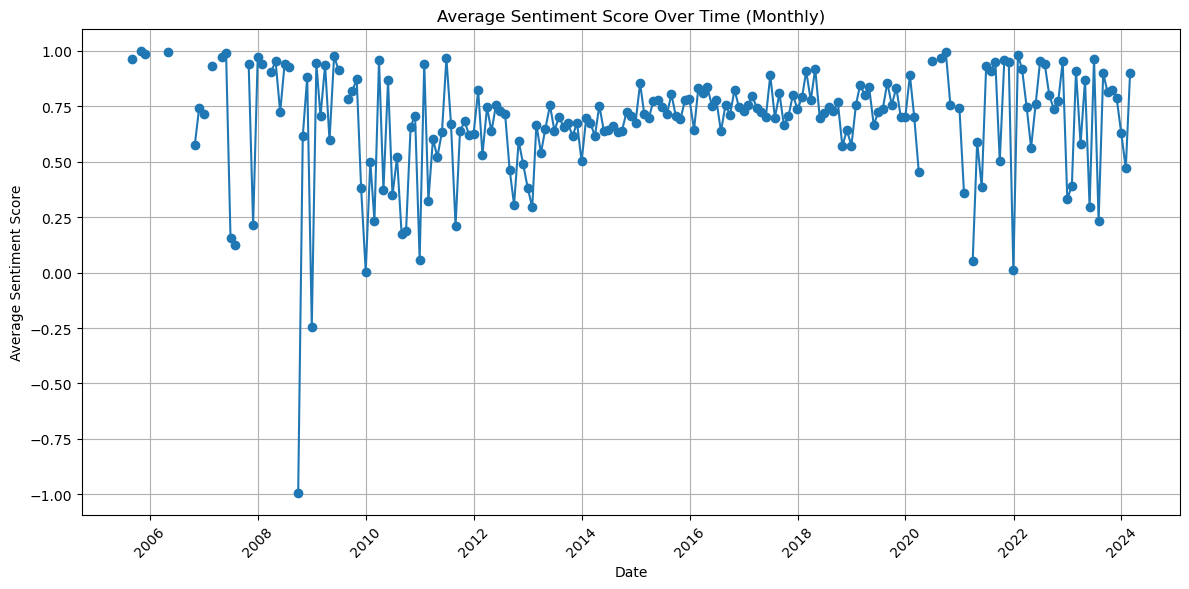

In [14]:
# Plotting sentiment trends by month
plt.figure(figsize=(12, 6))
plt.plot(train_dataMonthYear_monthly_mean['Stay Date'], train_dataMonthYear_monthly_mean['Sentiment Score'], marker='o', linestyle='-')
plt.title('Average Sentiment Score Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

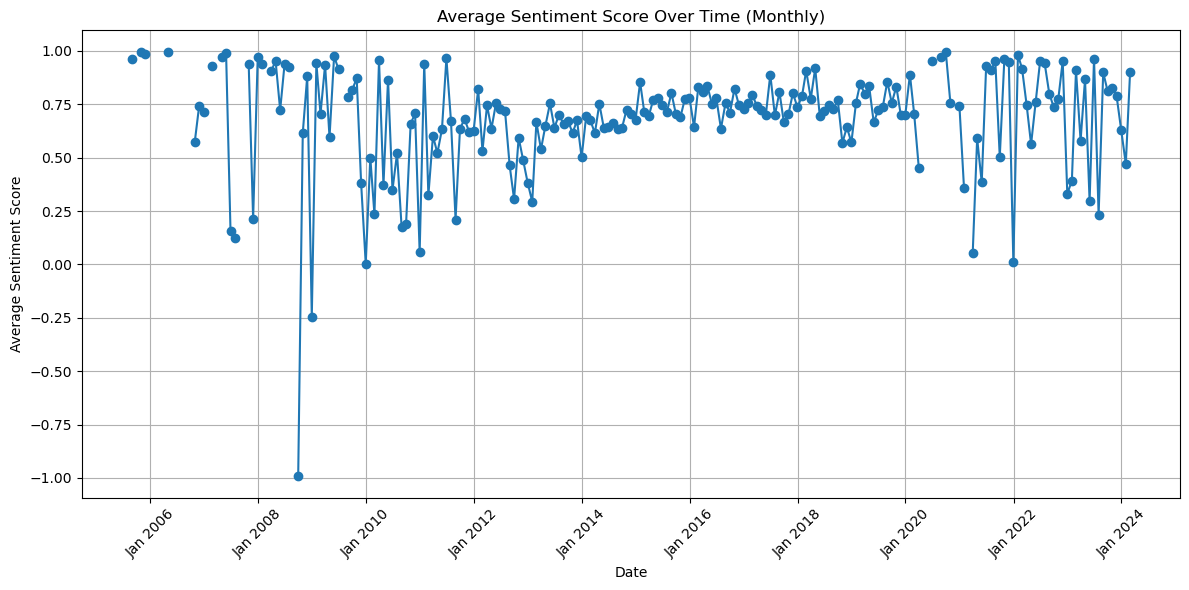

In [14]:
# Plotting sentiment trends by month (SAME GRAPH AS BEFORE BUT THIS ONE HAS THE NAME OF THE MONTHS)
plt.figure(figsize=(12, 6))
plt.plot(train_dataMonthYear_monthly_mean['Stay Date'], train_dataMonthYear_monthly_mean['Sentiment Score'], marker='o', linestyle='-')
plt.title('Average Sentiment Score Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')

# Format x-axis with month names
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# THE GRAPH BELOW IS CORRECT, ABOVE, NO.

In [16]:
# To ensure there are no anomalies
# Display summary of the final DataFrame
print("Summary of the final DataFrame:")
print(train_dataMonthYear_df.info())

# Check for any NaN values in the sentiment scores
print("Number of NaN values in 'Sentiment Score':", train_dataMonthYear_df['Sentiment Score'].isna().sum())

Summary of the final DataFrame:
,<class 'pandas.core.frame.DataFrame'>
,DatetimeIndex: 3747 entries, 2016-02-29 to 2015-12-31
,Data columns (total 5 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   User Location    2625 non-null   object 
, 1   Rating           3747 non-null   int64  
, 2   Location         3747 non-null   object 
, 3   Review Text      3747 non-null   object 
, 4   Sentiment Score  3747 non-null   float64
,dtypes: float64(1), int64(1), object(3)
,memory usage: 175.6+ KB
,None
,Number of NaN values in 'Sentiment Score': 0


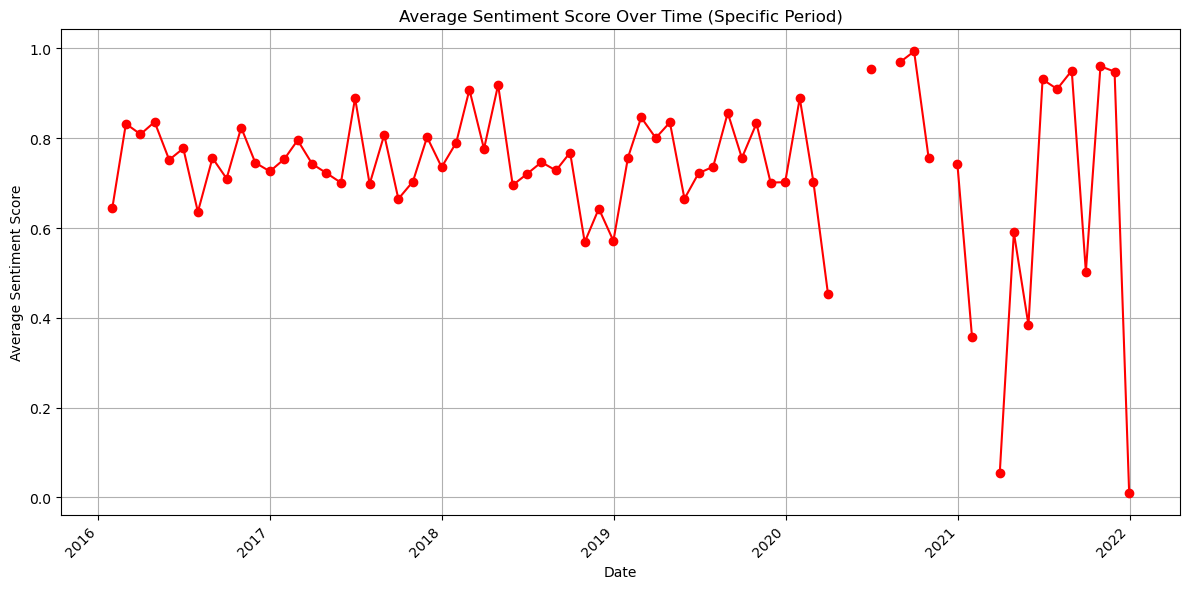

In [15]:
# Filter data for a specific year or range of dates
specific_period = train_dataMonthYear_monthly_mean[(train_dataMonthYear_monthly_mean['Stay Date'] >= '2016-01-01') & (train_dataMonthYear_monthly_mean['Stay Date'] <= '2021-12-31')]

# Plotting for a specific period
plt.figure(figsize=(12, 6))
plt.plot(specific_period['Stay Date'], specific_period['Sentiment Score'], marker='o', linestyle='-', color='r')
plt.title('Average Sentiment Score Over Time (Specific Period)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
## STAGE 4:
## Perform an Analysis of the Reviews, Comparing Summer and Winter

# Importing
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [19]:
# Filter data for summer (October to March)
## According to: https://www.climatelinks.org/sites/default/files/asset/document/mozambique_climate_vulnerability_profile_jan2013.pdf , These months are the ones defining summer and winter in Mozambique

##  selects all rows where the month is either October to December or January to March.
summer_periods = train_dataMonthYear_monthly_mean[
    (train_dataMonthYear_monthly_mean['Stay Date'].dt.month >= 10) | 
    (train_dataMonthYear_monthly_mean['Stay Date'].dt.month <= 3)
]

#selects all rows where the month is April to September.
# Filter data for winter (April to September)
winter_periods = train_dataMonthYear_monthly_mean[
    (train_dataMonthYear_monthly_mean['Stay Date'].dt.month >= 4) & 
    (train_dataMonthYear_monthly_mean['Stay Date'].dt.month <= 9)
]

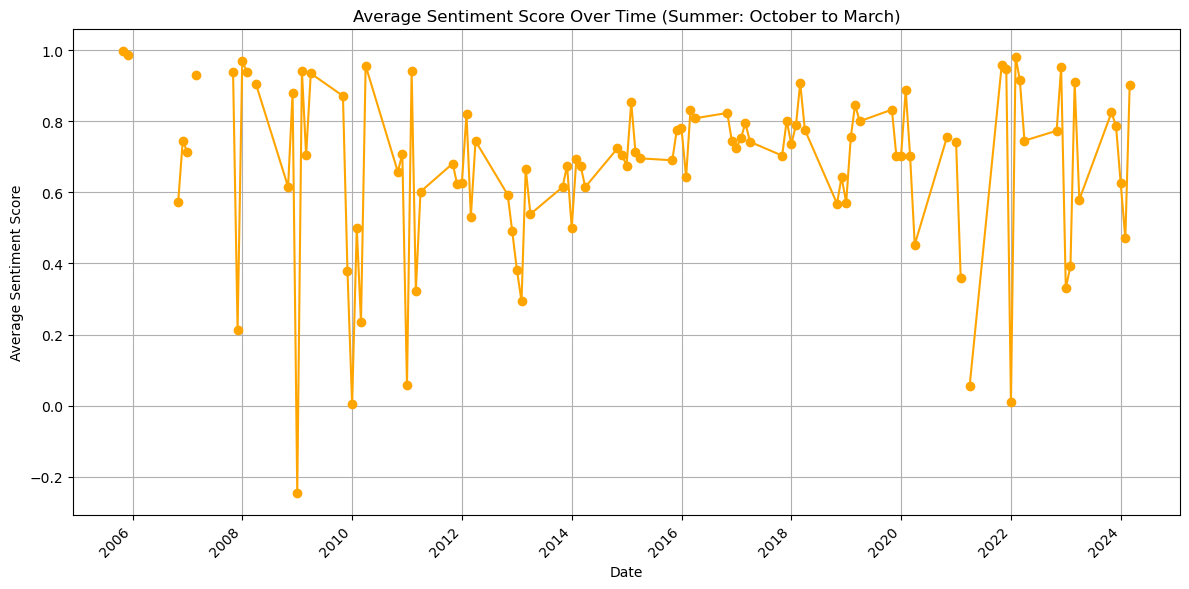

In [20]:
# Plotting for summer
plt.figure(figsize=(12, 6))
plt.plot(summer_periods['Stay Date'], summer_periods['Sentiment Score'], marker='o', linestyle='-', color='orange')
plt.title('Average Sentiment Score Over Time (Summer: October to March)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

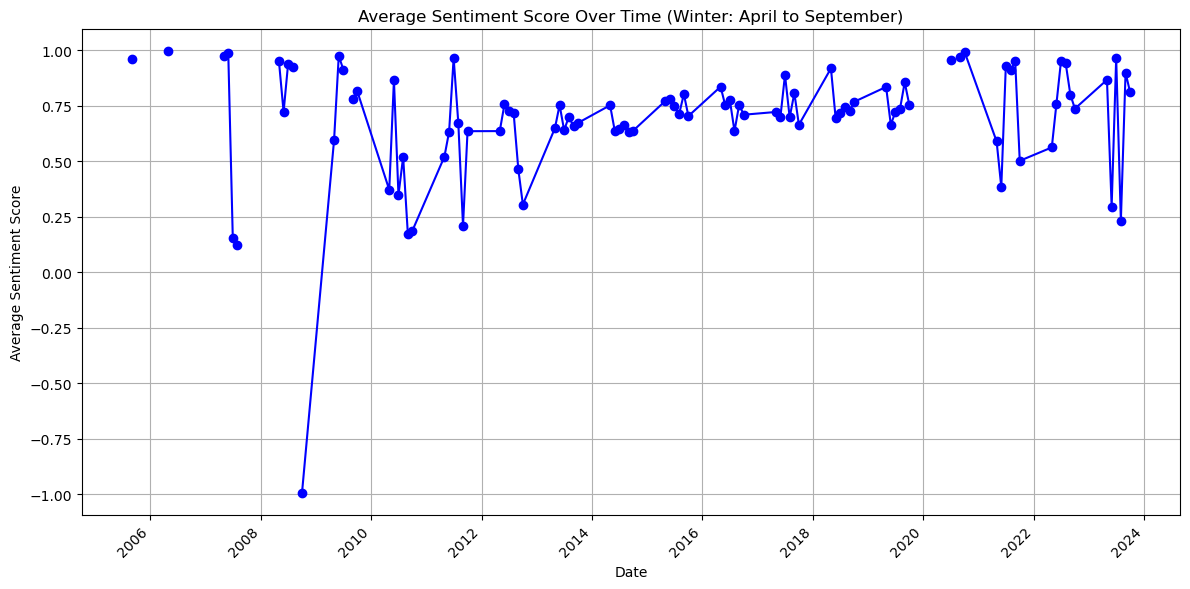

In [21]:
# Plotting for winter
plt.figure(figsize=(12, 6))
plt.plot(winter_periods['Stay Date'], winter_periods['Sentiment Score'], marker='o', linestyle='-', color='blue')
plt.title('Average Sentiment Score Over Time (Winter: April to September)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
## STAGE 4, DIFFERENT APPROACH:  which ammenities are mostly mentioned in summer and which are in winter

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Example list of amenities
amenities = ['service','room','staff','stay','clean','price','food','bed','restaurant','bathroom','breakfast','wifi', 'pool', 'parking', 'internet', 'wi-fi']

# Data is the variable defined at the start of STEP 3:
# Create DataFrame
df = pd.DataFrame(data) 

In [25]:
# Convert 'Stay Date' column to datetime
df['Stay Date'] = pd.to_datetime(df['Stay Date'])

In [27]:
# Define summer and winter periods
summer_months = [10, 11, 12, 1, 2, 3]  # October to March
winter_months = [4, 5, 6, 7, 8, 9]     # April to September

In [28]:
# Categorize reviews into summer and winter
df['Season'] = df['Stay Date'].dt.month.apply(lambda x: 'Summer' if x in summer_months else 'Winter')

In [29]:
# Initialize counters for amenities mentions
amenity_counts = {
    "Summer": {amenity: 0 for amenity in amenities},
    "Winter": {amenity: 0 for amenity in amenities}
}

In [30]:
# Function to count amenity mentions in a review
def count_amenities(review, season):
    for amenity in amenities:
        if amenity in review.lower():
            amenity_counts[season][amenity] += 1

# Apply function to each review
for index, row in df.iterrows():
    count_amenities(row['Review Text'], row['Season'])

# Convert the counts to DataFrame for easier visualization
amenity_counts_df = pd.DataFrame(amenity_counts)

# Display the counts
print(amenity_counts_df)

            Summer  Winter
,service        932     829
,room          1821    1815
,staff         1286    1341
,stay          1377    1339
,clean          841     881
,price          409     415
,food           778     761
,bed            398     418
,restaurant     768     743
,bathroom       309     301
,breakfast     1040    1077
,wifi           268     264
,pool           673     489
,parking         84      82
,internet       213     256
,wi-fi           56      62


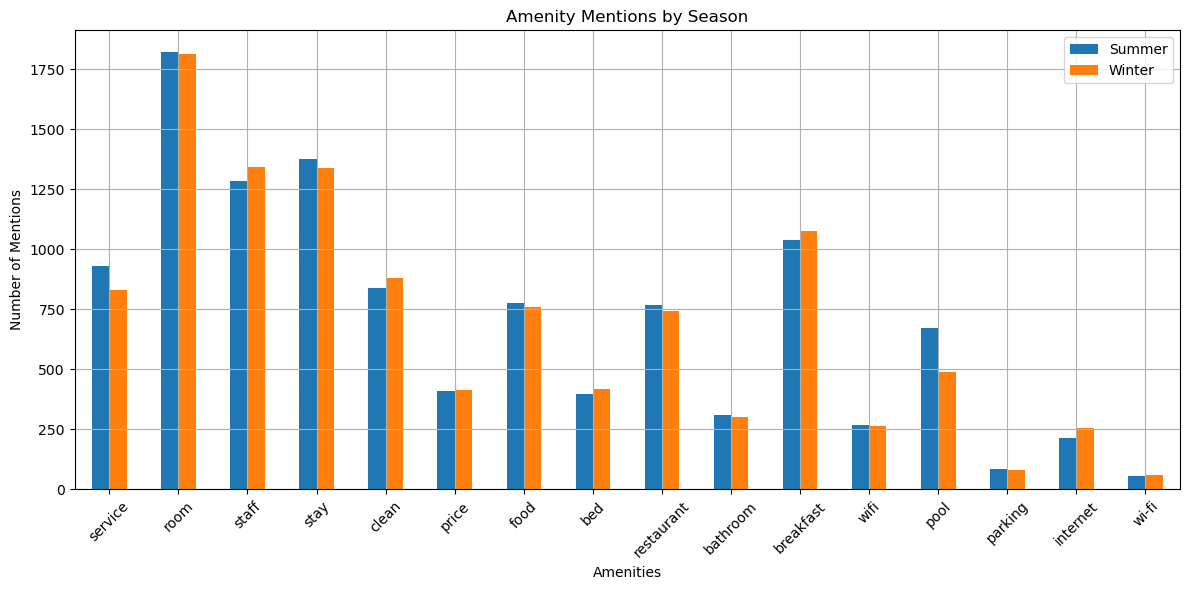

In [31]:
# Plot the data
amenity_counts_df.plot(kind='bar', figsize=(12, 6))
plt.title('Amenity Mentions by Season')
plt.xlabel('Amenities')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
## STEP 5 - GOAL 5
## Conduct an Analysis of the Reviews Based on the Region of the Hotel --  DON'T HAVE THIS COLUMN AS OF YET.


In [9]:
## STEP 7 - GOAL 7
## Find the most mentioned ammenities by user nationality
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
## "data" imported above

df = pd.DataFrame(data)

In [11]:
# List of amenities to look for
amenities = ['service','room','staff','stay','clean','price','food','bed','restaurant','bathroom','breakfast','wifi', 'pool', 'parking', 'internet', 'wi-fi']

In [12]:
# Function to extract mentioned amenities
def extract_amenities(text):
    text = text.lower()
    mentioned_amenities = [amenity for amenity in amenities if amenity in text]
    return mentioned_amenities

# Apply the function to the 'Review Text' column
df['Mentioned Amenities'] = df['Review Text'].apply(extract_amenities)

# Explode the 'Mentioned Amenities' column to have one row per amenity mention
exploded_df = df.explode('Mentioned Amenities')

# Group by 'User Location' and 'Mentioned Amenities' to count the occurrences
amenity_counts = exploded_df.groupby(['User Location', 'Mentioned Amenities']).size().reset_index(name='Count')

# Pivot the table for easier plotting
amenity_pivot = amenity_counts.pivot(index='User Location', columns='Mentioned Amenities', values='Count').fillna(0)

In [13]:
# Print the counts of mentioned amenities by user location
print(amenity_pivot)

Mentioned Amenities  bathroom  bed  breakfast  clean  food  internet  parking  \
,User Location                                                                   
,Aalst                     0.0  0.0        1.0    0.0   0.0       0.0      0.0   
,Aalten                    0.0  0.0        1.0    0.0   0.0       0.0      0.0   
,Aberdeen                  2.0  2.0        2.0    3.0   5.0       0.0      0.0   
,Abidjan                   0.0  1.0        4.0    3.0   1.0       0.0      0.0   
,Abu Dhabi                 1.0  1.0        2.0    2.0   4.0       3.0      0.0   
,...                       ...  ...        ...    ...   ...       ...      ...   
,Zambia                    3.0  1.0        1.0    2.0   4.0       2.0      0.0   
,Zanzibar Island           0.0  0.0        1.0    1.0   1.0       0.0      0.0   
,Zermatt                   0.0  0.0        1.0    0.0   0.0       0.0      0.0   
,Zimbabwe                  0.0  1.0        2.0    4.0   3.0       0.0      0.0   
,Zurich          

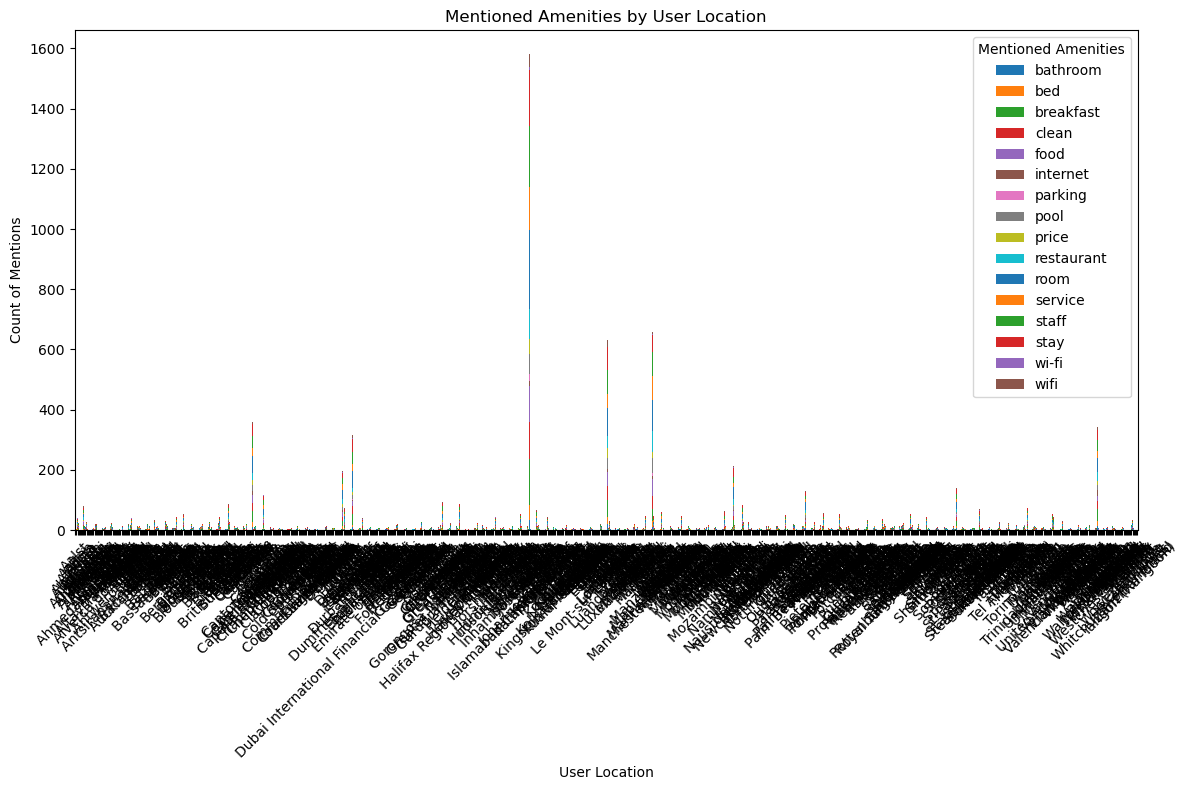

In [14]:
# Plotting the counts of mentioned amenities by user location
amenity_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Mentioned Amenities by User Location')
plt.xlabel('User Location')
plt.ylabel('Count of Mentions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
## The graph shows a lot of user locations, so we are going to choose the top 10 user locations and see which ammenity they mention the most

In [16]:
# Function to extract mentioned amenities
def extract_amenities(text):
    text = text.lower()
    mentioned_amenities = [amenity for amenity in amenities if amenity in text]
    return mentioned_amenities

# Apply the function to the 'Review Text' column
df['Mentioned Amenities'] = df['Review Text'].apply(extract_amenities)

# Explode the 'Mentioned Amenities' column to have one row per amenity mention
exploded_df = df.explode('Mentioned Amenities')

# Group by 'User Location' and 'Mentioned Amenities' to count the occurrences
amenity_counts = exploded_df.groupby(['User Location', 'Mentioned Amenities']).size().reset_index(name='Count')

# Get the top 10 user locations by the number of reviews
top_user_locations = df['User Location'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 user locations
top_amenity_counts = amenity_counts[amenity_counts['User Location'].isin(top_user_locations)]

# Pivot the table for easier plotting
top_amenity_pivot = top_amenity_counts.pivot(index='User Location', columns='Mentioned Amenities', values='Count').fillna(0)

In [17]:
# Print the counts of mentioned amenities by top 10 user locations
print(top_amenity_pivot)

Mentioned Amenities  bathroom   bed  breakfast  clean   food  internet  \
,User Location                                                            
,Cape Town                 6.0   7.0       26.0   13.0   17.0       1.0   
,Cape Town Central        11.0  17.0       34.0   29.0   27.0      11.0   
,Durban                   10.0   7.0       38.0   25.0   17.0       2.0   
,Johannesburg             32.0  52.0      152.0  122.0  121.0      15.0   
,Lisbon                    5.0   3.0       30.0   24.0   15.0       3.0   
,London                   20.0  23.0       58.0   45.0   46.0      11.0   
,Maputo                   11.0  18.0       42.0   42.0   56.0      12.0   
,Nairobi                   3.0   8.0       21.0   14.0   17.0       4.0   
,Pretoria                  8.0  11.0       40.0   35.0   33.0       2.0   
,Washington DC            14.0  17.0       38.0   28.0   17.0      18.0   
,
,Mentioned Amenities  parking  pool  price  restaurant   room  service  staff  \
,User Location    

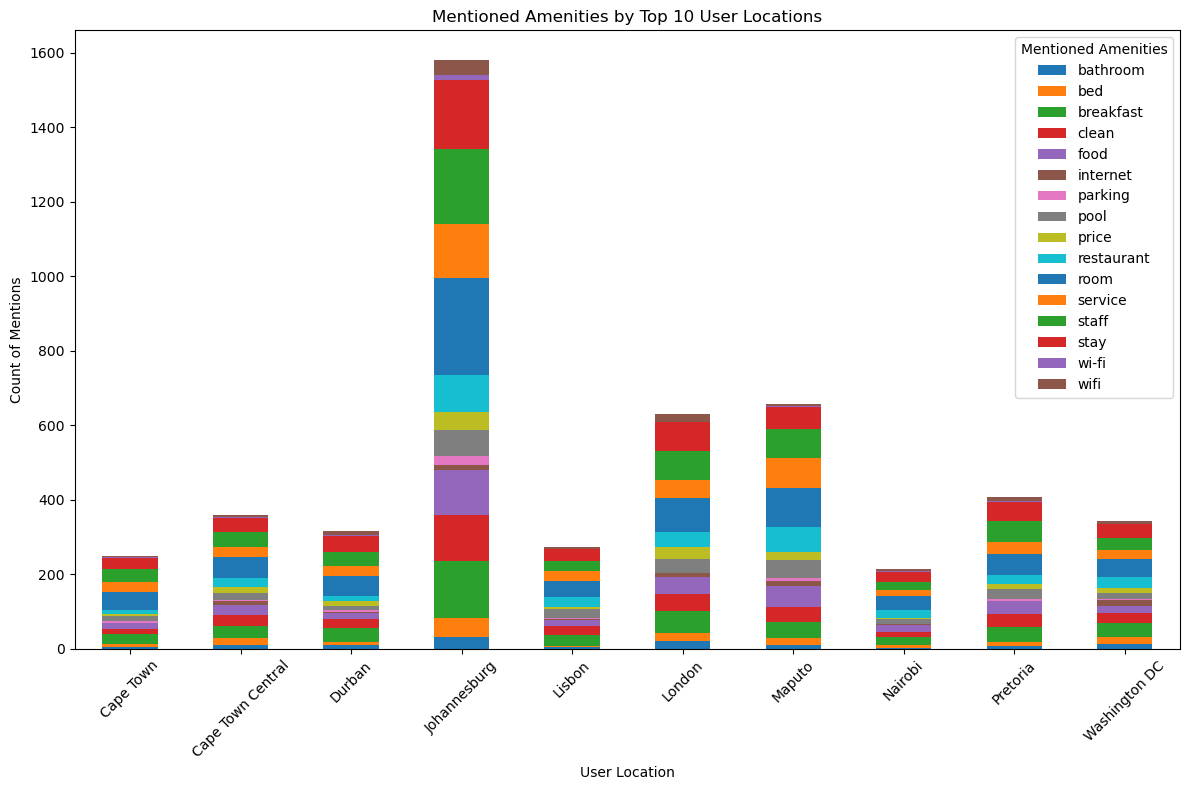

In [18]:
# Plotting the counts of mentioned amenities by top 10 user locations
top_amenity_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Mentioned Amenities by Top 10 User Locations')
plt.xlabel('User Location')
plt.ylabel('Count of Mentions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
import matplotlib.pyplot as plt

# Function to extract mentioned amenities
def extract_amenities(text):
    text = text.lower()
    mentioned_amenities = [amenity for amenity in amenities if amenity in text]
    return mentioned_amenities

# Apply the function to the 'Review Text' column
df['Mentioned Amenities'] = df['Review Text'].apply(extract_amenities)

# Explode the 'Mentioned Amenities' column to have one row per amenity mention
exploded_df = df.explode('Mentioned Amenities')

# Group by 'User Location' and 'Mentioned Amenities' to count the occurrences
amenity_counts = exploded_df.groupby(['User Location', 'Mentioned Amenities']).size().reset_index(name='Count')

# Get the top 10 user locations by the number of reviews
top_user_locations = df['User Location'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 user locations
top_amenity_counts = amenity_counts[amenity_counts['User Location'].isin(top_user_locations)]

# List of unique amenities
unique_amenities = top_amenity_counts['Mentioned Amenities'].unique()


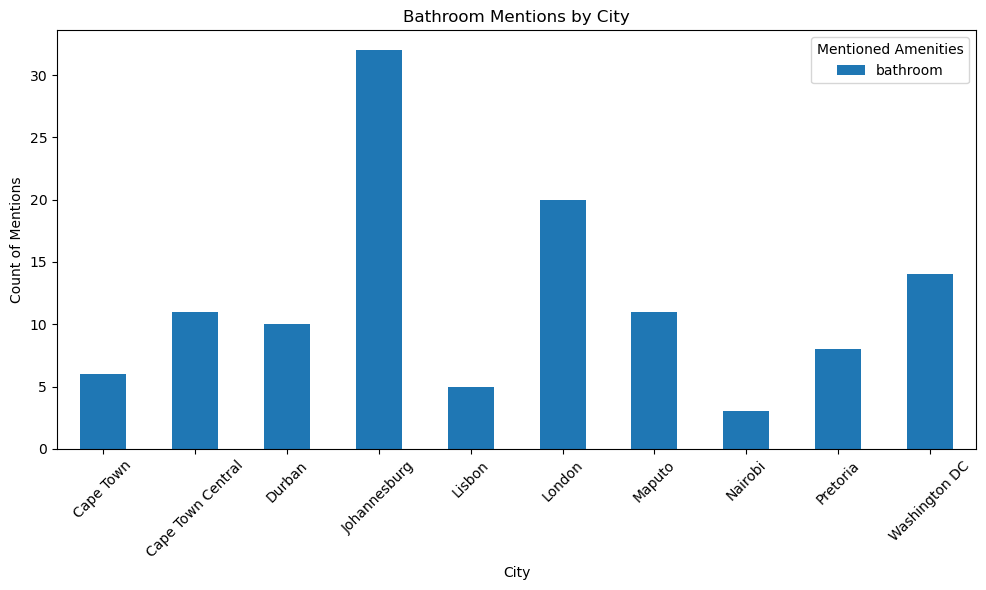

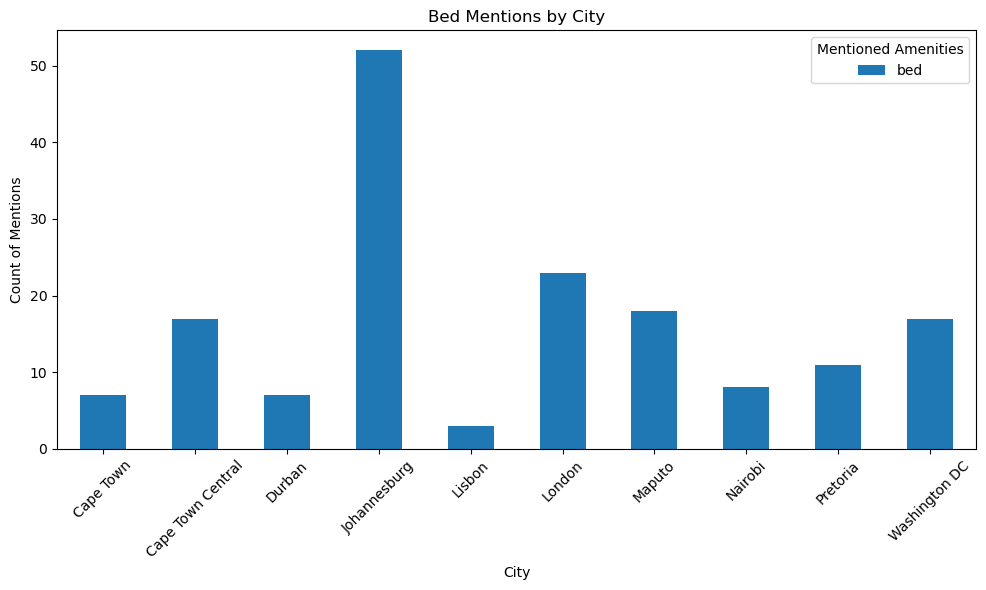

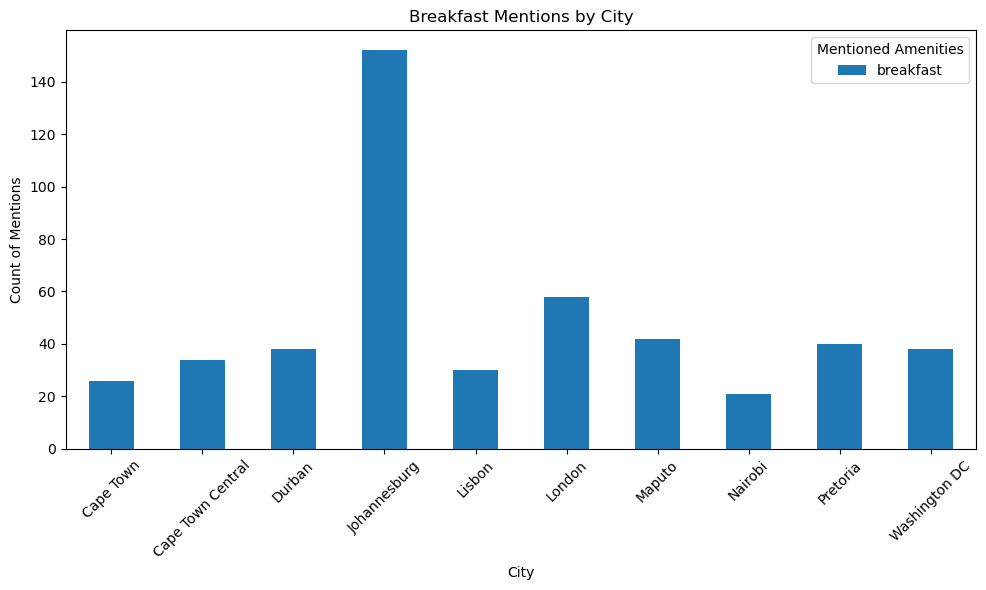

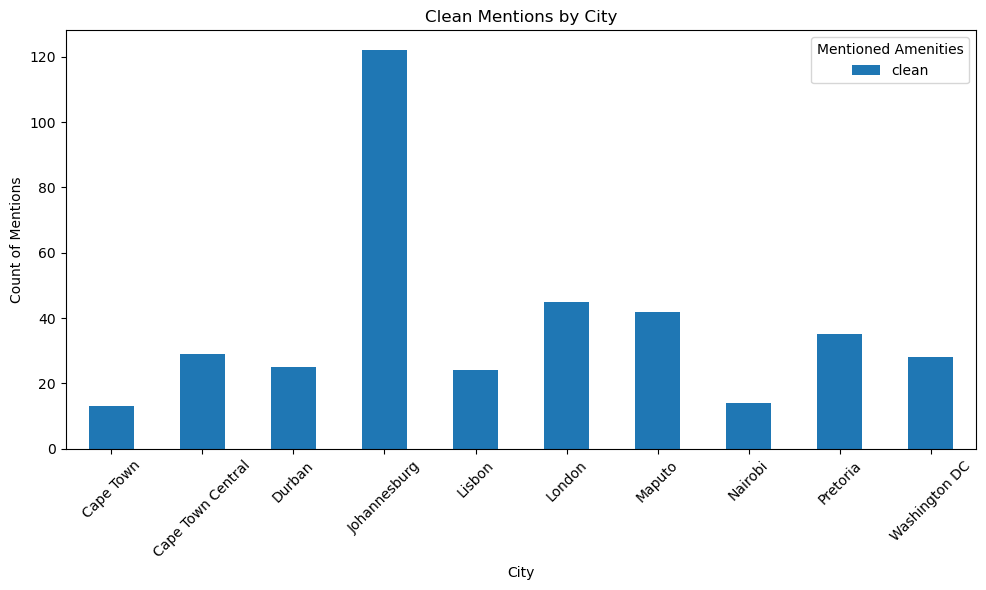

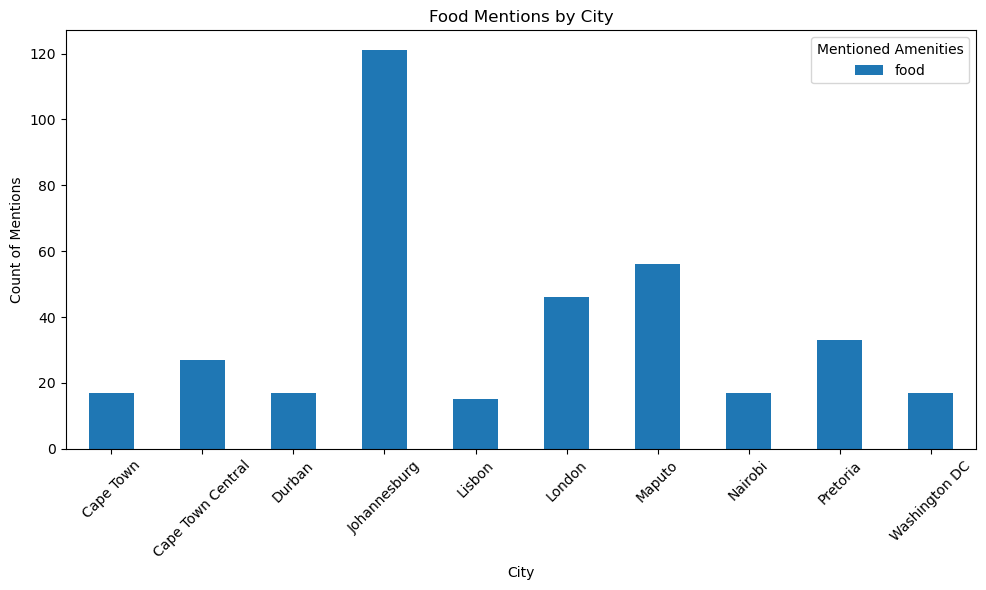

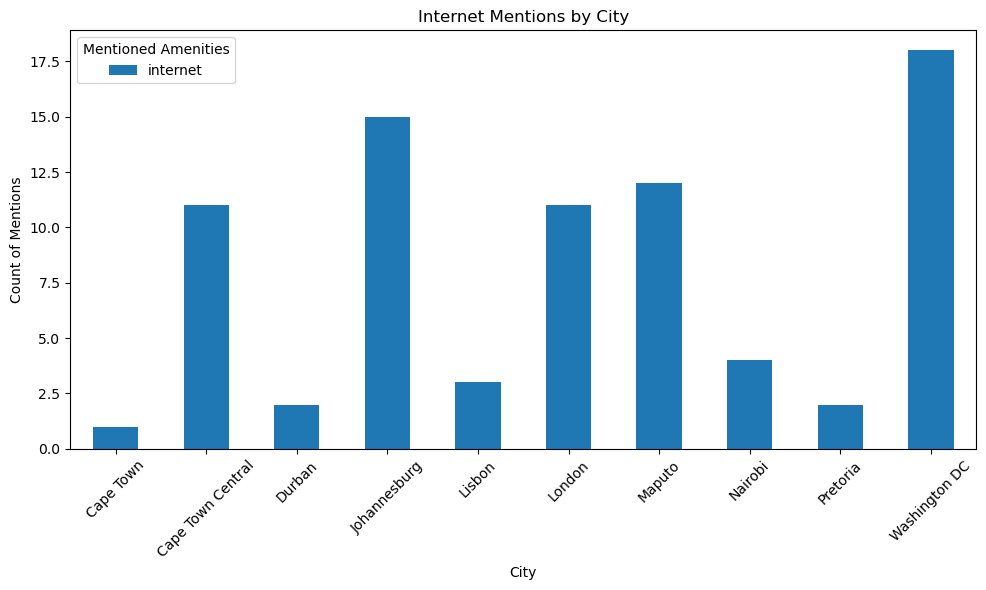

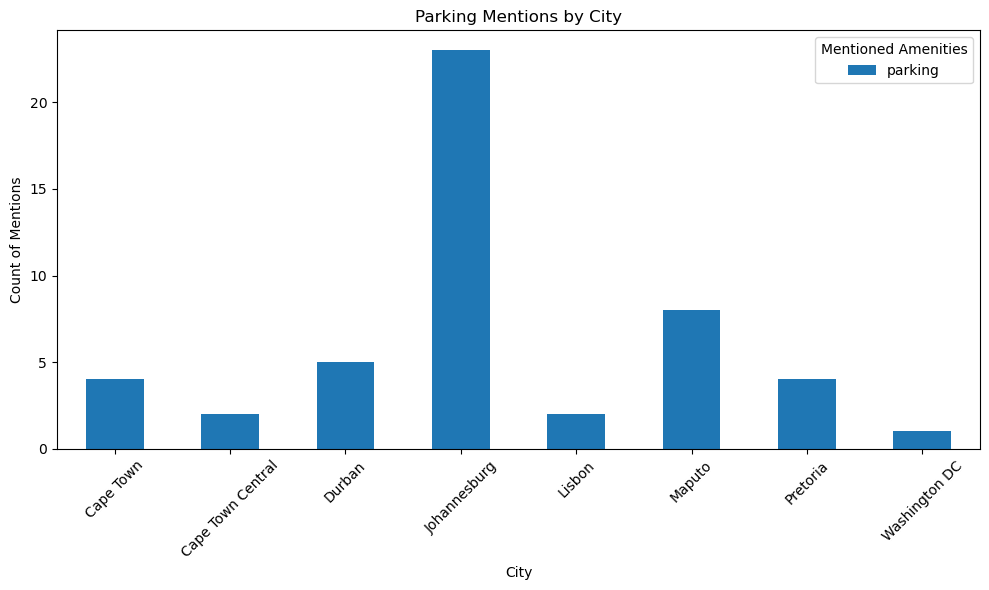

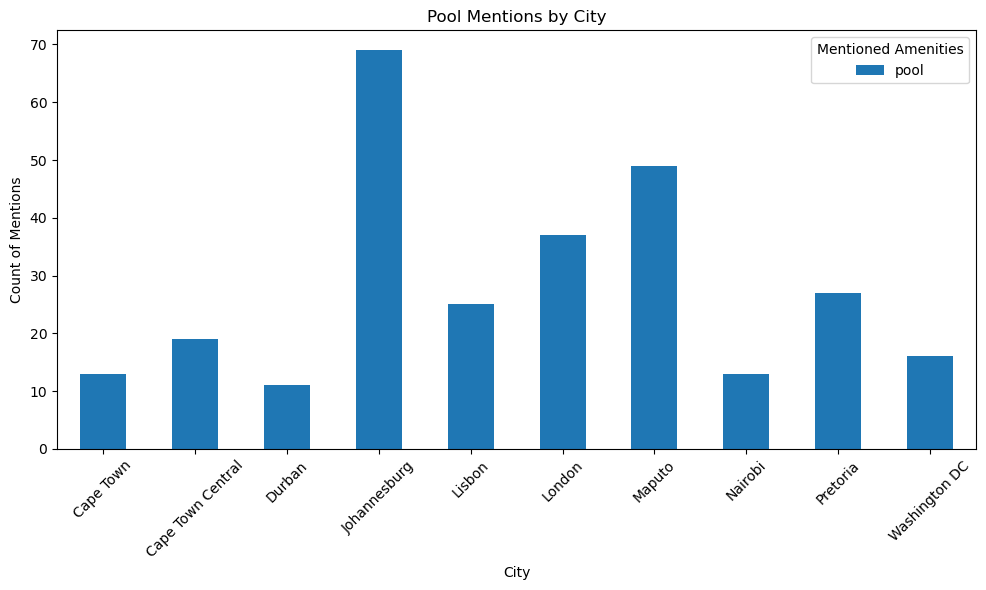

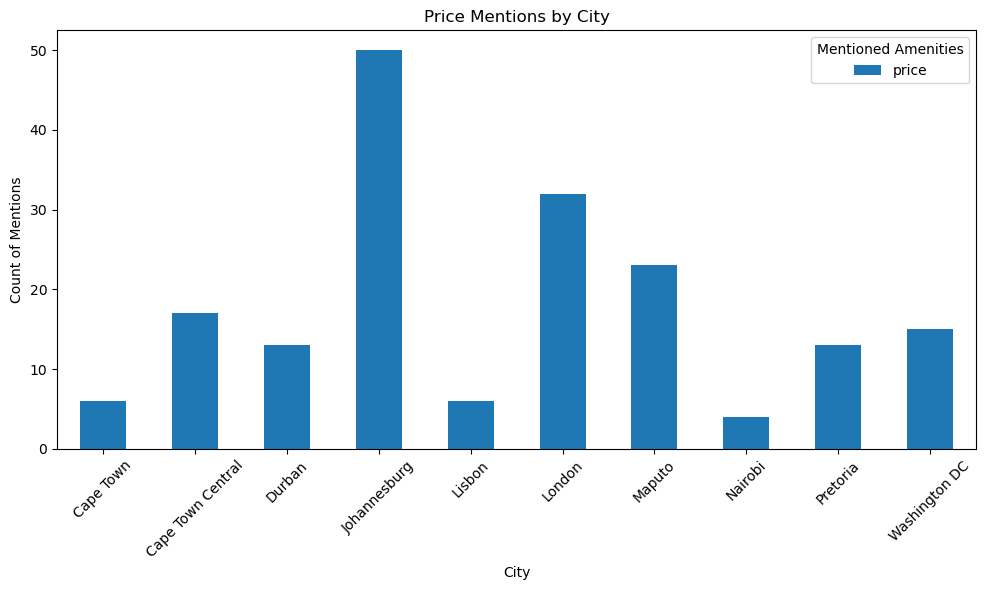

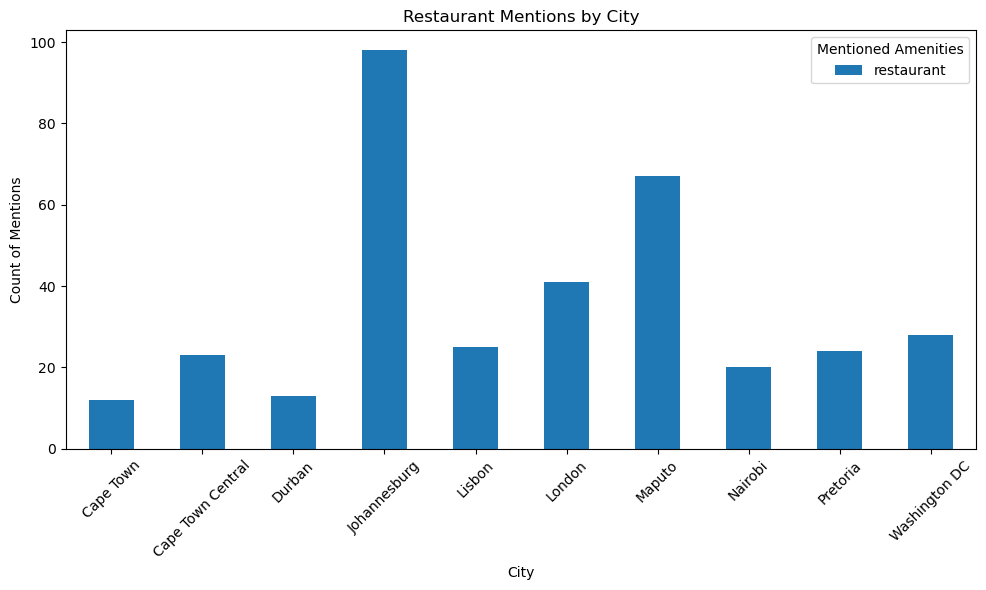

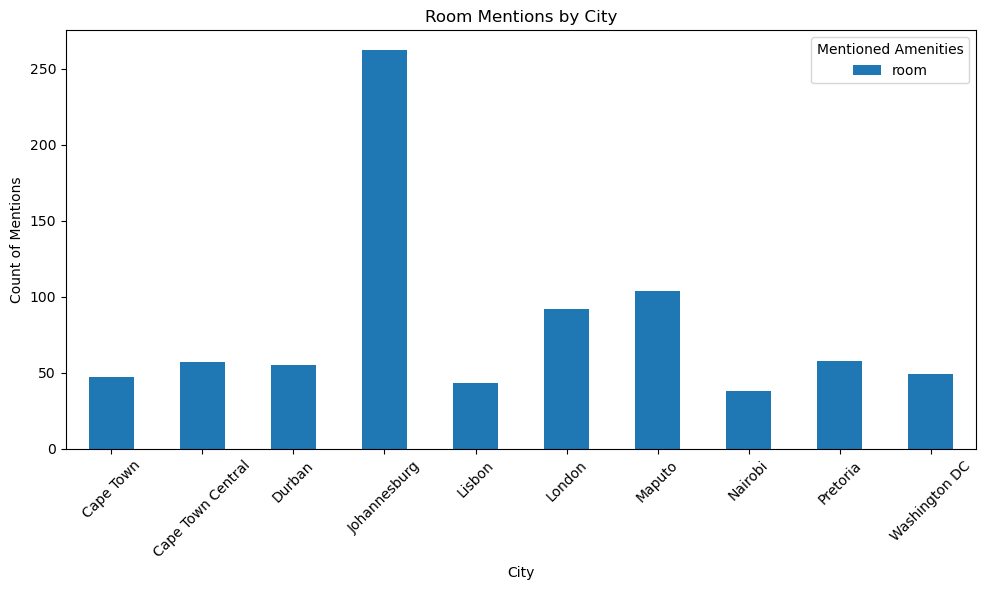

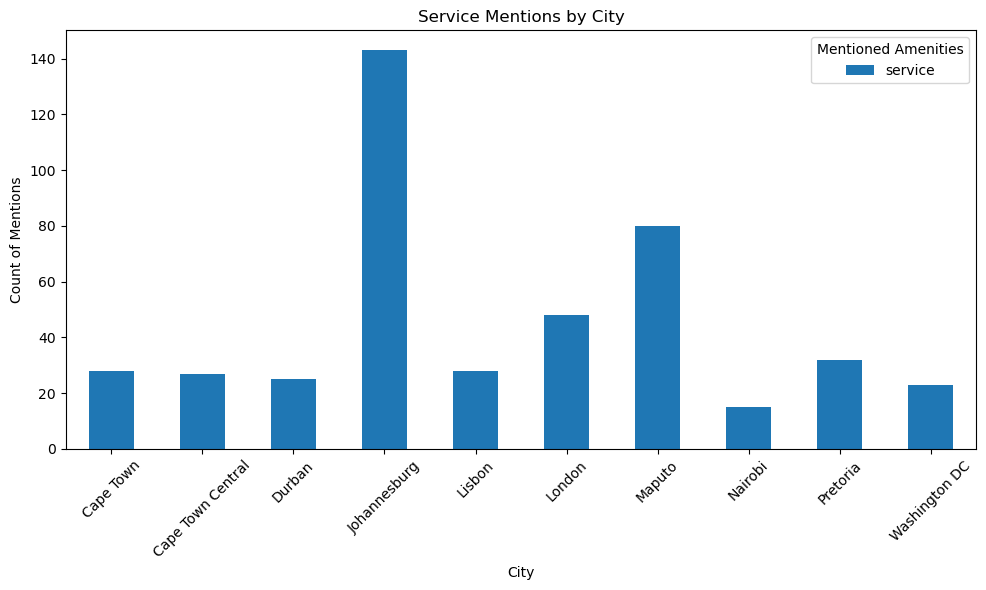

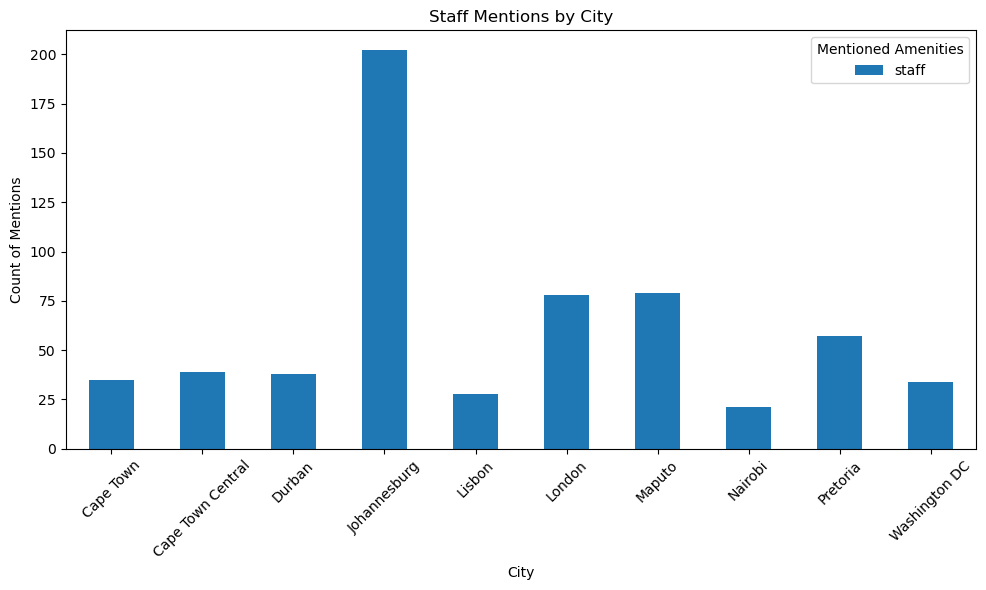

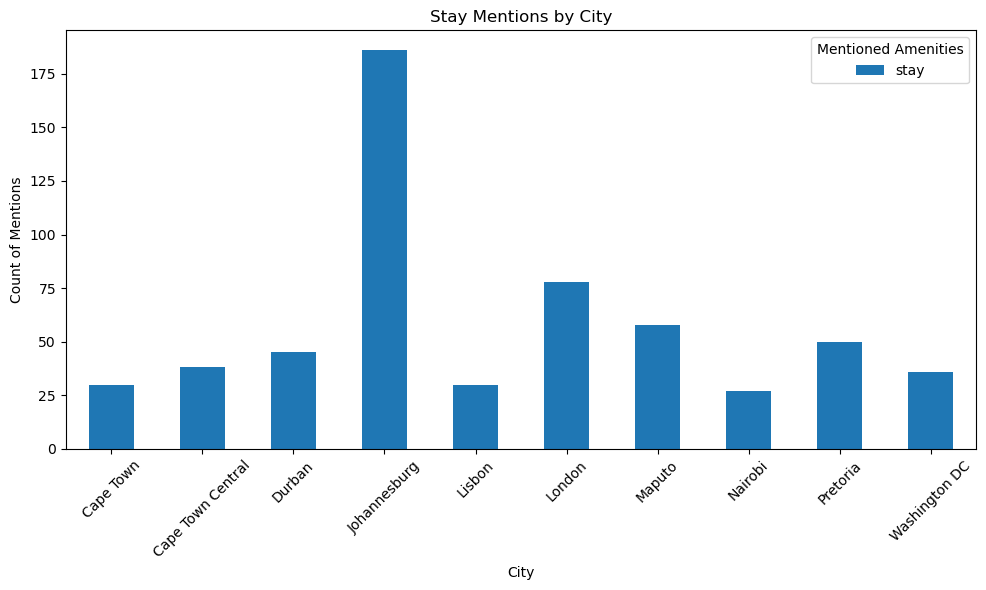

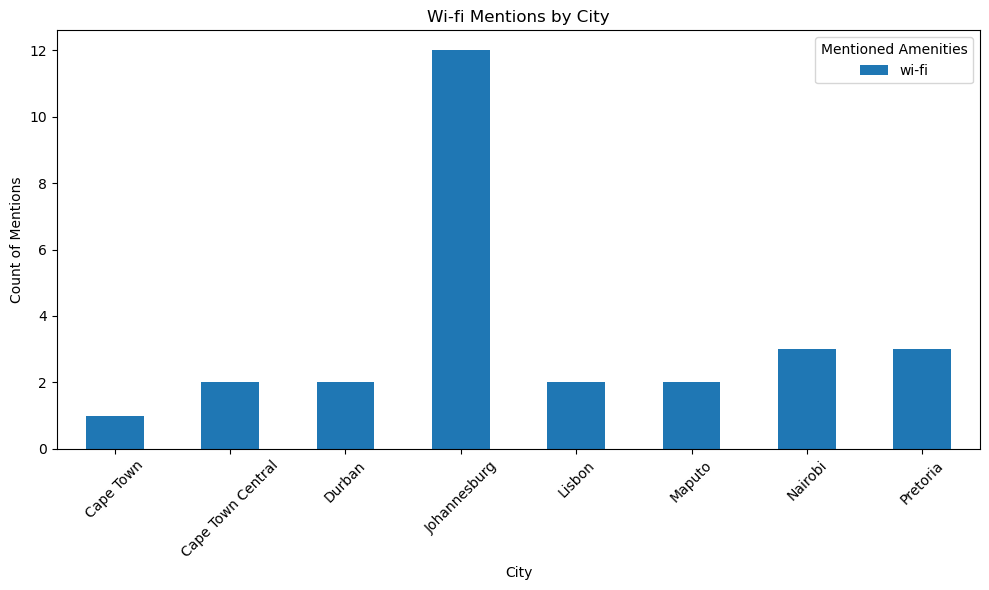

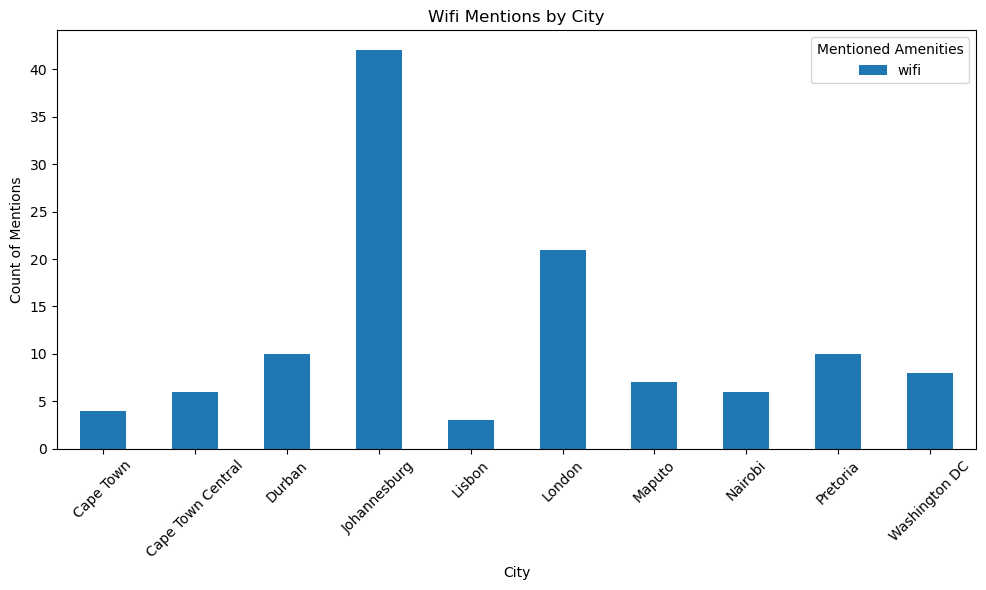

In [22]:
# Loop through each unique amenity and create a separate graph
for amenity in unique_amenities:
    # Filter the data for the current amenity
    amenity_data = top_amenity_counts[top_amenity_counts['Mentioned Amenities'] == amenity]
    
    # Pivot the data to make it easier for plotting
    amenity_pivot = amenity_data.pivot(index='User Location', columns='Mentioned Amenities', values='Count').fillna(0)
    
    # Plotting the bar chart for the current amenity
    amenity_pivot.plot(kind='bar', stacked=False, figsize=(10, 6))
    
    # Adding titles and labels
    plt.title(f'{amenity.capitalize()} Mentions by City')
    plt.xlabel('City')
    plt.ylabel('Count of Mentions')
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.tight_layout()
    plt.show()